In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

BICEP MODEL

In [8]:
df_train_B = pd.read_csv('bicep_train.csv')
df_test_B = pd.read_csv('bicep_test.csv')

df_train_B['label'] = df_train_B['label'].replace({'C': 1, 'L': 0})
df_test_B['label'] = df_test_B['label'].replace({'C': 1, 'L': 0})

X_train_B= df_train_B.drop('label', axis=1)  
y_train_B= df_train_B['label']  

X_test_B= df_test_B.drop('label', axis=1)
y_test_B = df_test_B['label']

xgb_model = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5
)

xgb_model.fit(X_train_B, y_train_B)

y_pred_B = xgb_model.predict(X_test_B)

accuracy = accuracy_score(y_test_B, y_pred_B)
class_report = classification_report(y_test_B, y_pred_B)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8924

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       265
           1       0.91      0.90      0.90       339

    accuracy                           0.89       604
   macro avg       0.89      0.89      0.89       604
weighted avg       0.89      0.89      0.89       604



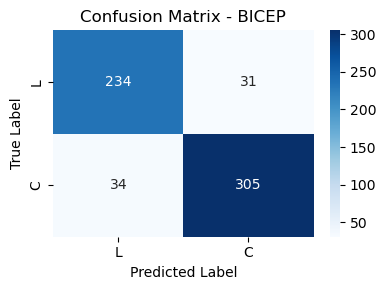

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix_B = confusion_matrix(y_test_B, y_pred_B)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_B, annot=True, fmt='d', cmap='Blues', xticklabels=['L', 'C'], yticklabels=['L', 'C'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - BICEP")
plt.tight_layout()
plt.show()


In [12]:
df_train_S = pd.read_csv('squat_train.csv')
df_test_S = pd.read_csv('squat_test.csv')

df_train_S['label'] = df_train_S['label'].replace({'up': 1, 'down': 0})
df_test_S['label'] = df_test_S['label'].replace({'up': 1, 'down': 0})

X_train_S= df_train_S.drop('label', axis=1)
y_train_S= df_train_S['label']

X_test_S= df_test_S.drop('label', axis=1)
y_test_S = df_test_S['label']

xgb_model = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5
)

xgb_model.fit(X_train_S, y_train_S)

y_pred_S = xgb_model.predict(X_test_S)

accuracy = accuracy_score(y_test_S, y_pred_S)
class_report = classification_report(y_test_S, y_pred_S)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9965

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       1.00      1.00      1.00       423

    accuracy                           1.00       853
   macro avg       1.00      1.00      1.00       853
weighted avg       1.00      1.00      1.00       853



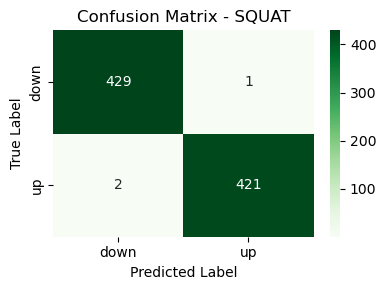

In [13]:
conf_matrix_S = confusion_matrix(y_test_S, y_pred_S)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_S, annot=True, fmt='d', cmap='Greens', xticklabels=['down', 'up'], yticklabels=['down', 'up'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SQUAT")
plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

# BICEP metrics
precision_B = precision_score(y_test_B, y_pred_B)
recall_B = recall_score(y_test_B, y_pred_B)
f1_B = f1_score(y_test_B, y_pred_B)

print("📊 BICEP Model Performance:")
print(f"Precision: {precision_B:.4f}")
print(f"Recall: {recall_B:.4f}")
print(f"F1 Score: {f1_B:.4f}\n")

# SQUAT metrics
precision_S = precision_score(y_test_S, y_pred_S)
recall_S = recall_score(y_test_S, y_pred_S)
f1_S = f1_score(y_test_S, y_pred_S)

print("📊 SQUAT Model Performance:")
print(f"Precision: {precision_S:.4f}")
print(f"Recall: {recall_S:.4f}")
print(f"F1 Score: {f1_S:.4f}")


📊 BICEP Model Performance:
Precision: 0.9077
Recall: 0.8997
F1 Score: 0.9037

📊 SQUAT Model Performance:
Precision: 0.9976
Recall: 0.9953
F1 Score: 0.9964
